<h1 style="text-align: center;">Project: Supervised Learning — Classifier</h1>
<h2 style="text-align: center;">Bank Customer Churn Prediction</h2>


### `--> About the dataset.` 
The dataset from Kaggle contains 10,000 rows and 14 columns. Its objective is to predict if a customer will leave the bank based on their demographics and financial information. The independent variables are factors influencing churn, while the target (dependent) variable is whether the customer decides to leave.

### Data Disctionary:
| **Column Name**      | **Description**
| :------------------- | :--------------------------------------------------------------------------------------------------------------------------------- |
| `RowNumber`          | The index of the row in the dataset.
| `CustomerId`         | A unique identifier for each customer.
| `Surname`            | The last name of the customer.
| `CreditScore`        | A numerical score representing the customer's creditworthiness.
| `Geography`          | The customer’s location (e.g., country or region).
| `Gender`             | The customer’s gender (e.g., Male, Female).                                          
| `Age`                | The customer’s age in years.
| `Tenure`             | The number of years the customer has been with the bank.
| `Balance`            | The current account balance of the customer.
| `NumOfProducts`      | The number of products the customer holds with the bank (e.g., savings, loans).
| `HasCrCard`          | Whether the customer has a credit card (1 for yes, 0 for no).
| `IsActiveMember`     | Whether the customer is an active bank member (1 for yes, 0 for no).
| `EstimatedSalary`    | The estimated annual salary of the customer.
| `Exited`             | Whether the customer has left the bank (1 for yes, 0 for no).


### `--> Import required libraries`

--> Key Columns for Churn Analysis:
* CreditScore: Customers with low credit scores may face financial difficulties, increasing churn risk.
* Age: Younger customers may switch banks more frequently, while older customers tend to stay loyal.
* Tenure: The longer a customer has been with the bank, the less likely they are to churn.
* Balance: A low balance may indicate disengagement, while a high balance might indicate customer satisfaction and loyalty.
* NumOfProducts: The more products a customer holds, the less likely they are to churn, as they are more invested in the bank’s services.
* IsActiveMember: Inactive members have a higher risk of churn due to disengagement.
* Exited: This is your target variable for prediction—whether the customer churned or not.

In [513]:
import pandas as pd
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix,mean_absolute_error,r2_score

# import  statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore') 


### `--> Date preprocessing 1`

In [464]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Tenure : refers to the length of time a customer has been with the bank or holding a specific account or financial product

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [466]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [467]:
print('Missing Data count = ',df.isna().sum().sum())
print('Duplicated Data num = ', df.duplicated().sum())

Missing Data count =  0
Duplicated Data num =  0


In [468]:
# Drop unecessary columns
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

### `--> EDA`

#### 1 - Univariate  Analysis

- categorical col

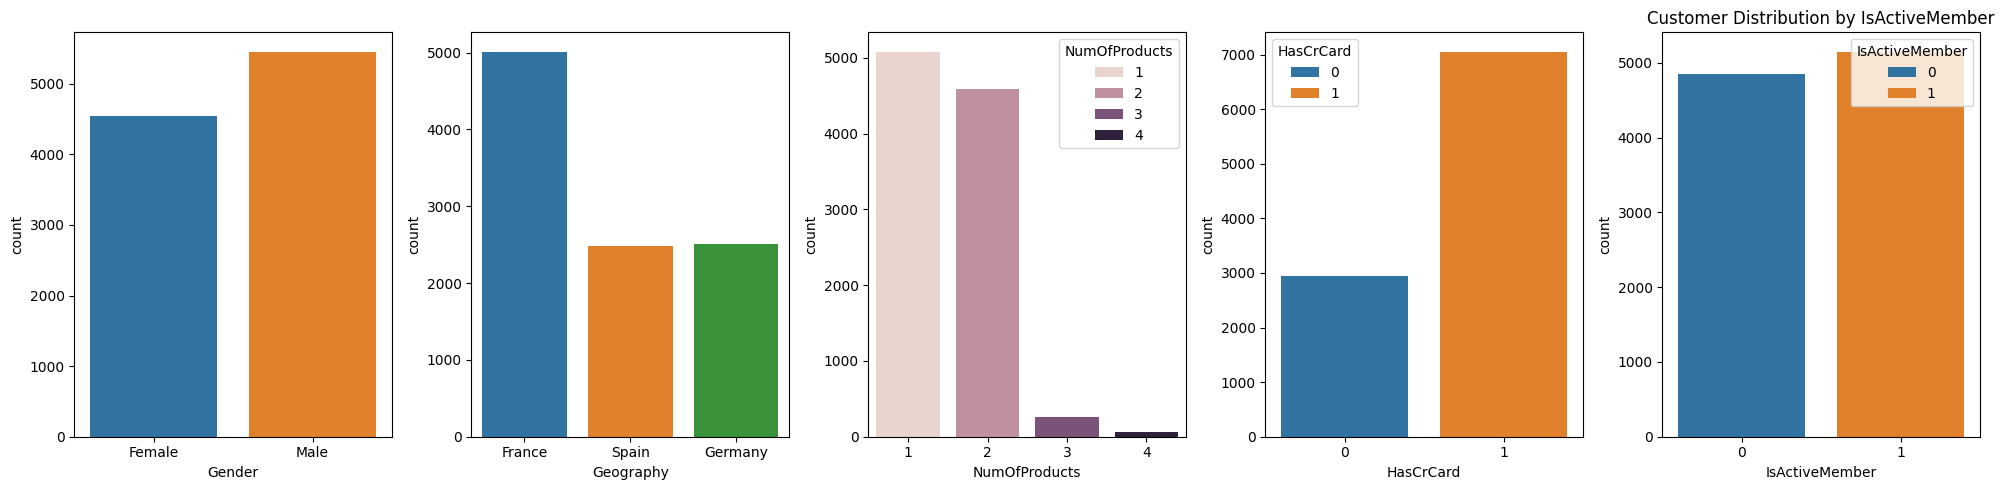

In [469]:
# plot Geographical locations
cat_col = ['Gender', 'Geography','NumOfProducts', 'HasCrCard' , 'IsActiveMember'] 
fig, axes = plt.subplots(1,5 , figsize=(20, 5))  # 1 row, 3 columns
axes = axes.flatten()

for i,col in enumerate(cat_col):
    sns.countplot(data = df, x=df[col],hue=df[col],ax=axes[i])
    plt.title(f"Customer Distribution by {col}")

plt.tight_layout()
plt.show()



- Numerical col

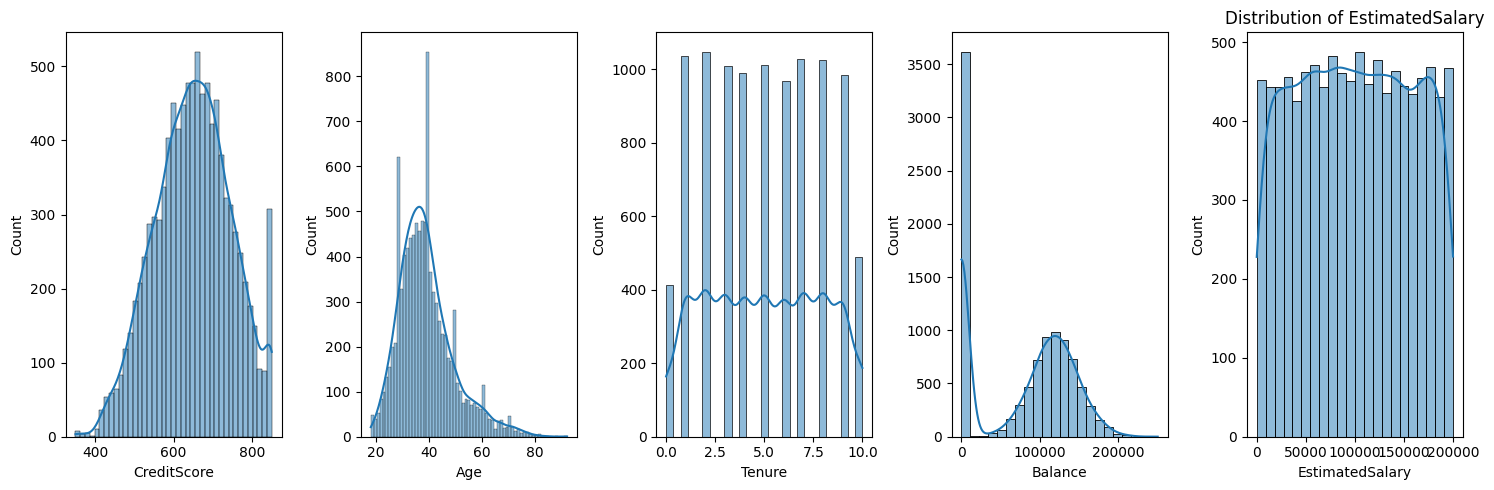

In [470]:
No_col = [ 'CreditScore','Age' ,'Tenure', 'Balance','EstimatedSalary']
fig, axes = plt.subplots(1,5 , figsize=(15, 5))  
axes = axes.flatten()
for i,col in enumerate(No_col):
    sns.histplot(data =df, x=df[col],kde=True,ax=axes[i])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- Target [Exited] 

In [471]:
fig = px.pie(values=df['Exited'].value_counts(),names=['Exited','Retained'],
             title='Distribution of Customer Churn [Exited]',
             color_discrete_sequence=px.colors.sequential.Plasma_r,# Color palette
             hole=0.4)
fig.show()

#### 2 - Bivariate  Analysis
- Tenure vs Exited

Text(0, 0.5, 'Number of customers')

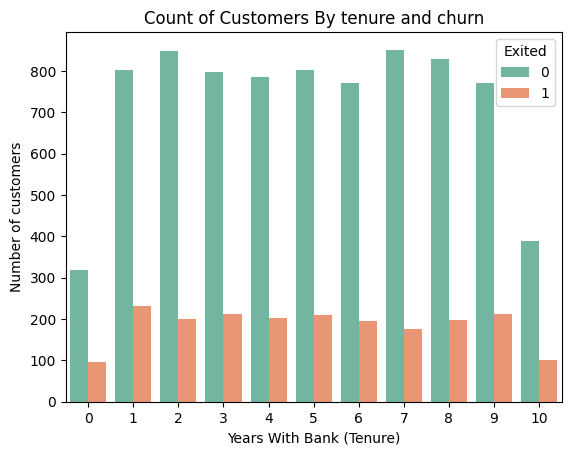

In [472]:
sns.countplot(data=df, x='Tenure',hue='Exited',palette='Set2')
plt.title('Count of Customers By tenure and churn')
plt.xlabel('Years With Bank (Tenure)')
plt.ylabel('Number of customers')

- Credit Score VS Exited

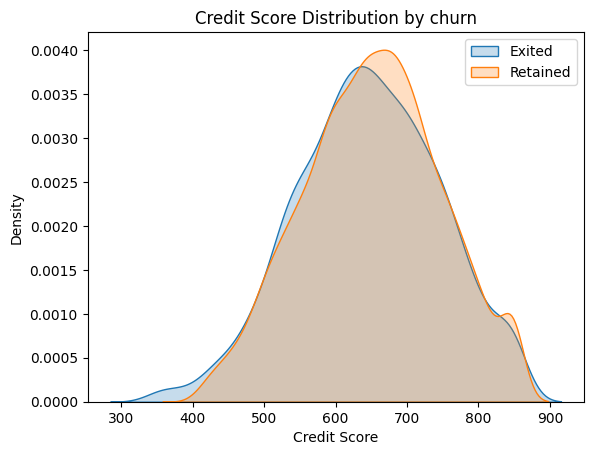

In [473]:
sns.kdeplot(df[df['Exited'] == 1]['CreditScore'], label='Exited',shade=True)
sns.kdeplot(df[df['Exited'] == 0]['CreditScore'], label='Retained',shade = True)
plt.title('Credit Score Distribution by churn')
plt.xlabel('Credit Score')
plt.legend(loc='upper right', frameon=True)
plt.show()

Observations:<br>
    - Credit score for retained customers are slightly higher than churned customers.  

- Geogaphy VS Exited

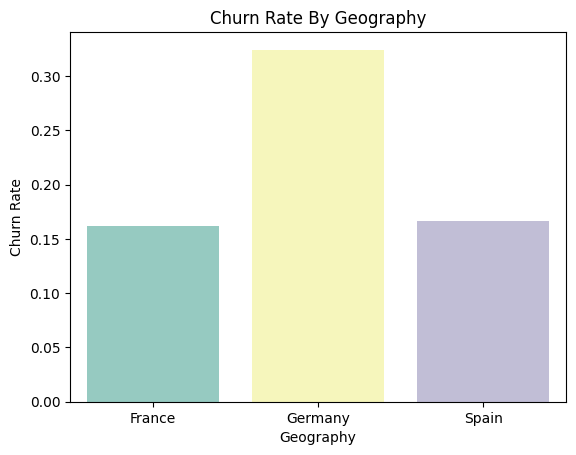

In [474]:
geo_churn = df.groupby('Geography')['Exited'].mean().reset_index()
sns.barplot(data=geo_churn,x='Geography',y='Exited',palette='Set3')
plt.ylabel('Churn Rate')
plt.title('Churn Rate By Geography')
plt.show()

Observations : Germany has the highest Churn Rate.

- Balance VS Exited

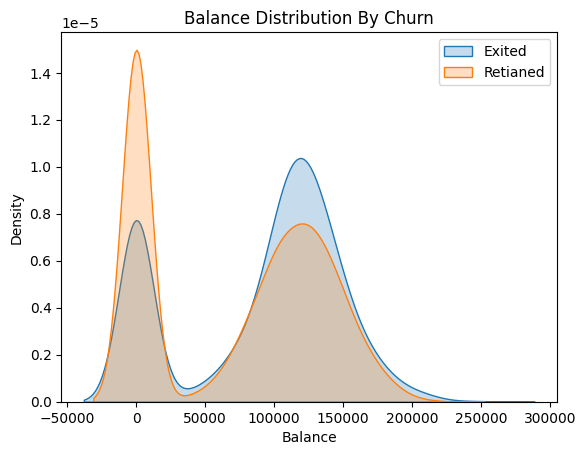

In [475]:
sns.kdeplot(df[df['Exited'] == 1]['Balance'], label='Exited',shade=True, )
sns.kdeplot(df[df['Exited'] == 0]['Balance'], label='Retianed',shade=True)
plt.title('Balance Distribution By Churn')
plt.legend(loc='upper right', frameon=True)
plt.show()

OBS: Customers with almost Zero Balance [lower Balance] Lean more to Retain

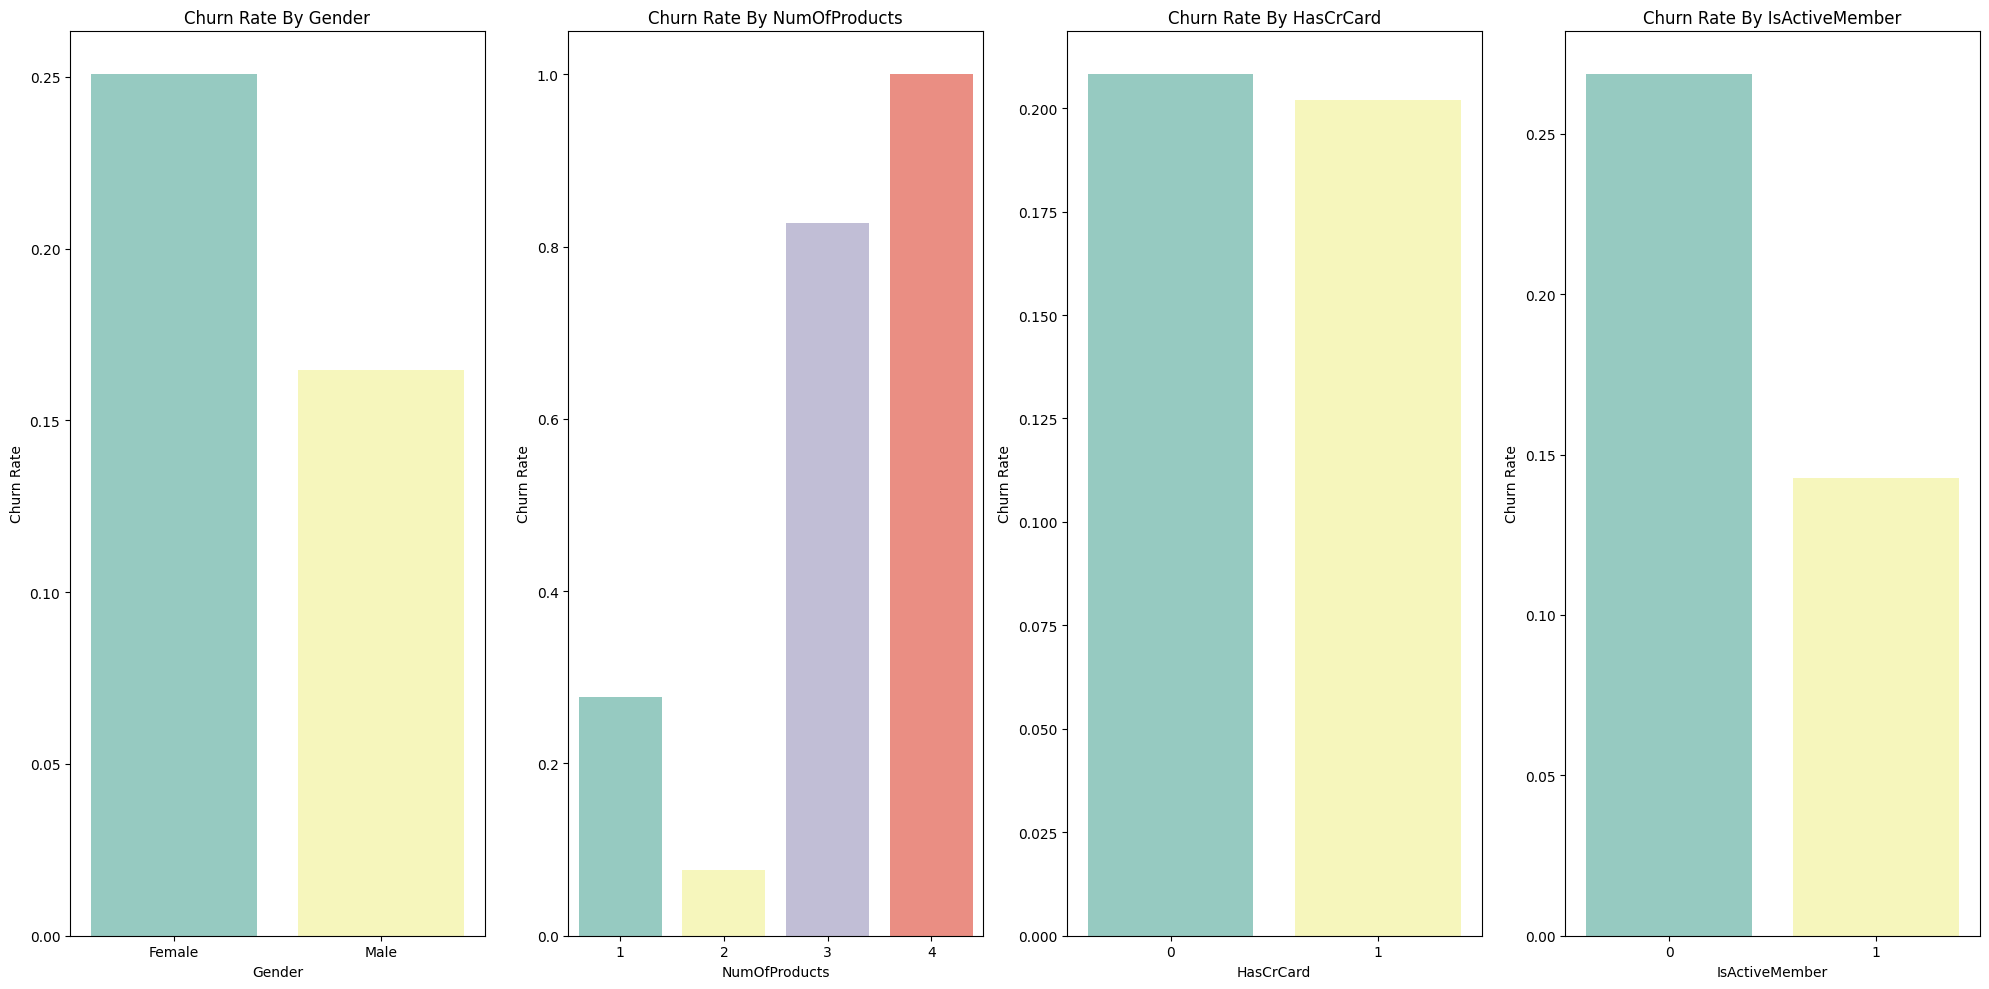

In [476]:
# let's Check if Categorical Cols affects The Chrning Rate
cat_c = ['Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig,axes = plt.subplots(1,4,figsize=(20,10))
for i,col in enumerate(cat_c):
    ChurnRate_ByCol = df.groupby(col)['Exited'].mean().reset_index()
    sns.barplot(data=ChurnRate_ByCol, x= col,y='Exited',palette='Set3',ax =axes[i])
    axes[i].set_title(f'Churn Rate By {col}')
    axes[i].set_ylabel('Churn Rate')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

OBS: 
* Female Churning Rate is Higher
* Higher products Number means Higher Churning possibility.
* Owning a credit card or not doesn't affect Churning Rate.
* Active members are more prone to retain.


### 3 - MultiVariate Analysis

- Gender & Geography VS Exited

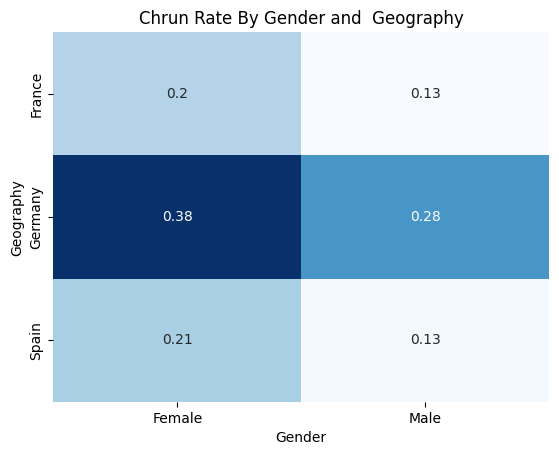

In [477]:
pivot = pd.pivot_table(df,values='Exited',index='Geography',columns='Gender',aggfunc='mean')
sns.heatmap(pivot, annot=True,cmap='Blues',cbar=False)
plt.title('Chrun Rate By Gender and  Geography')
plt.show()

OBS: The most Churned Gender is Females in the three countries

In [478]:
fig = px.histogram(df, x= 'Age',color='Exited',nbins=50,barmode='overlay',
                   title='Churn Rate By Age',
                   labels={'Exited' : 'Exited(1 = Yes , 0 = No)'},
                                color_discrete_sequence=px.colors.sequential.RdBu,# Color palette
                   )
fig.show()

OBS: The churn rate is higher for older customers. 

- Estimated Salary VS Exited 

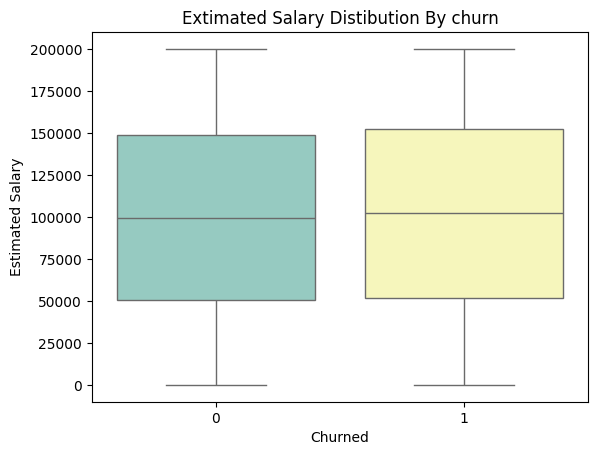

In [479]:
sns.boxplot(df,x='Exited',y='EstimatedSalary',palette='Set3')
plt.title('Extimated Salary Distibution By churn')
plt.xlabel('Churned')
plt.ylabel('Estimated Salary')
plt.show()

OBS: Churned Customers salary average is a bit higher of the average of Ratained Customers 

- Age & Balance VS Exited

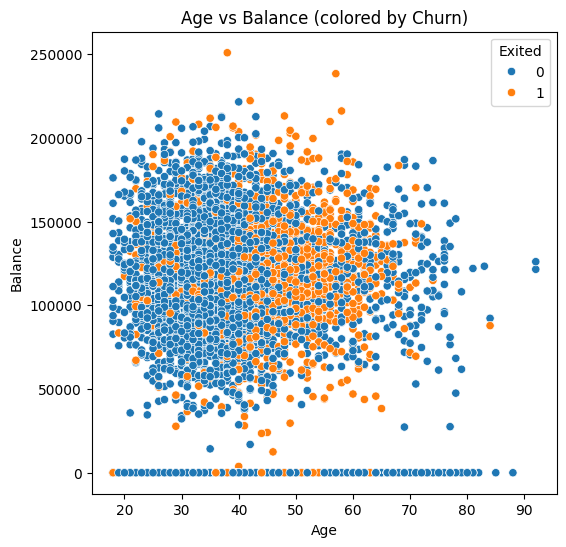

In [480]:
plt.figure(figsize=(6,6))
sns.scatterplot(df,x='Age',y='Balance',hue='Exited')
plt.title('Age vs Balance (colored by Churn)')
plt.show()

### `--> Date preprocessing 2`

one hot encoding --> geography <br>
Exited --> Churned <br>
x = `geo,gender`,   -(products,Active)        `balance,age`, tenure <br>
heatmap after encoding ?? <br>
 
feature enginnering ?? the output 

Data Preprocessing:

    1- Load data in Pandas.
    2- Drop columns that aren’t useful.
    3- Drop rows with missing values. 
    +  Drpping outliers
    4- Create dummy variables\ encoding categorical data.
    + Scale/normalize numerical variables.
    + feature selection 
    + feature engineering
    + Dimensionality Reduction (Optional) [PCA]

    5- Take care of missing data.
    6- Convert the data frame to NumPy.
    7- Divide the data set into training data and test data.
    8- model training 
    9- Evaluation , hyperparapmeter Tuning 










### --> `one Hot Encoding`
* Geography & Gender

In [481]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output= False) # drop = 'first' == drops first cols,    >>> avoid colinearity 
# it's okey if it's binary only two cols as one col can represent them both 

# Fit and transform the categorical columns
encoded_data = ohe.fit_transform(df[['Geography', 'Gender']])

# Convert the result back to a dataframe
encoded_df = pd.DataFrame(encoded_data,columns= ohe.get_feature_names_out())

encoded_df.columns = encoded_df.columns.str.replace('Gender_', '').str.replace('Geography_', '')

# Concatenate with the original data (after dropping the categorical columns)
df = df.drop(['Geography','Gender'],axis=1)
df_final = pd.concat([df,encoded_df], axis=1)

In [482]:
df_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


## --> `Coorelation Matrix Heatmap`


<Axes: >

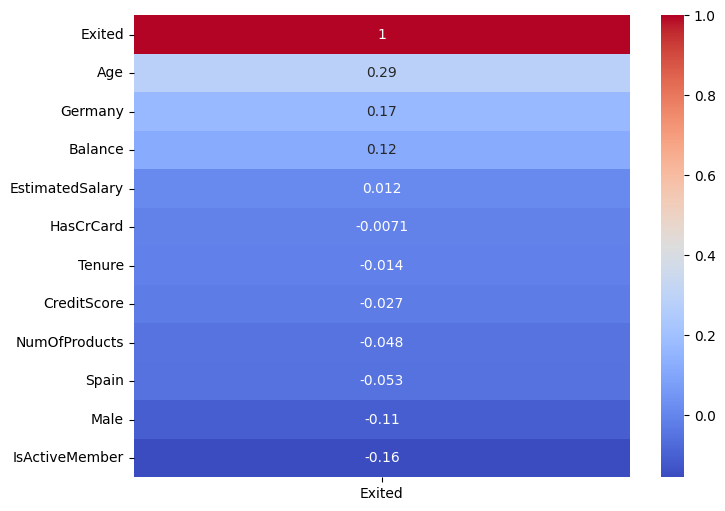

In [483]:
# Calculate correlation matrix
correlation_matrix = df_final.corr()

# Create a heatmap focused on the 'Exited' column
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False), annot=True, cmap='coolwarm')


OBS: There is no significant coorelation among the variables. So, I will proceed to model building.

### --> `feature Scaling` 

In [484]:
cols_to_scale = ['CreditScore','Age','EstimatedSalary','Balance']

# For standardization (mean=0, std=1)
scaler = StandardScaler()

df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])
                 

--> PCA 

In [485]:
# from sklearn.decomposition import PCA

# # Apply PCA to retain 95% of the variance
# pca = PCA(n_components=0.95)
# df_pca = pca.fit_transform(df_final)

# # Check how much variance is explained by each principal component
# explained_variance = pca.explained_variance_ratio_
# print(f"Explained variance per component: {explained_variance}")
# print(f"Total explained variance: {sum(explained_variance)}")

In [486]:
# # Screen plot
# plt.figure(figsize=(8,6))
# plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance')
# plt.show()

In [487]:
# # Transform the original data into the principal components
# df_pca = pca.transform(df_final)

# # Convert back to a DataFrame
# df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])
# df_pca.head()


In [488]:
# # Get X,Y--> Features and Target cols.
# X = df_final.drop('Exited',axis=1)
# Y = df['Exited'] 

# from sklearn.decomposition import PCA

# # Split the dataset into training and testing sets (80% train, 20% test)
# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# # Apply PCA to reduce dimensionality
# pca = PCA(n_components=2)  # Reduce to 2 components
# X_train_pca = pca.fit_transform(x_train)
# X_test_pca = pca.transform(x_test)

# # Create a Logistic Regression model
# logistic_model = LogisticRegression(max_iter=200)

# # Train the Logistic Regression model with PCA-transformed features
# logistic_model.fit(X_train_pca, y_train)

# # Make predictions on the test set
# y_pred = logistic_model.predict(X_test_pca)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# # Print the results
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", report)

# # Explained variance by each principal component
# print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)



### `--> Model Training `

##### 1- LR Model
##### 2- DT Model
##### 3- RF Model

- ## `Logistic Regression Model`

In [489]:
# Get X,Y--> Features and Target cols.
X = df_final.drop('Exited',axis=1)
Y = df['Exited'] 
# Split the dataset into training and testing sets (80% train, 20% test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [490]:
# Create a LR Model
model = LogisticRegression()


In [491]:
# Initialize RFE
# Ensure you provide the correct number of features to select
selector = RFE(estimator= model,n_features_to_select=5)
# Fit the RFE
selector = selector.fit(x_train,y_train)
# Get The Selected Features 
selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)


Selected features: Index(['Age', 'Balance', 'IsActiveMember', 'Germany', 'Male'], dtype='object')


In [492]:
# Train the Logistic Regression model with selected features
model.fit(x_train[selected_features],y_train)
# Make predictions on the test set
y_pred = model.predict(x_test[selected_features])


In [493]:
# Evaluate the model
accuracy_LR = accuracy_score(y_test,y_pred)
print('Acuuracy = ',accuracy_LR*100,'%')
# print('\nclassification_report\n',classification_report(y_test,y_pred))

Acuuracy =  81.25 %


- ## `Random Forest Model`

In [494]:
# Create a random forest classifier 
RFC_model = RandomForestClassifier(n_estimators=100,random_state=42)


In [495]:
# Define the paramaters Distribution
param_dist = {
    'n_estimators' : np.arange(10,201,10),
    'max_depth' : [None] + list(range(1,11)),
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4,5],
    'max_features' : ['auto' , 'sqrt','log2'],
    'bootstrap' : [True,False]
}

# Set Up Random Search 
random_search = RandomizedSearchCV(estimator=RFC_model,param_distributions=param_dist,
                                   n_iter = 100,cv=5,scoring='accuracy',
                                   verbose=1, n_jobs=-1,random_state=42)
# Fit Random Search 
random_search.fit(x_train,y_train)
# Best Parameters Found 
best_parameters = random_search.best_params_
print("Best Parameters (Random Search):", best_parameters)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (Random Search): {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [496]:
# Train the Random Forest model with best paramters
best_forest = random_search.best_estimator_
best_forest.fit(x_train,y_train)
# Make predictions on the test set
RFy_pred = best_forest.predict(x_test)

In [497]:
# Evaluate the model
accuracy_RF = accuracy_score(y_test, RFy_pred)
report_RF = classification_report(y_test, RFy_pred)

# Print the results
print("Random Forest Model Accuracy:", accuracy_RF)

Random Forest Model Accuracy: 0.8615


- ##  `Decision Tree  Model`

In [498]:
# Create a Decision Tree Classifier
DTC_model = DecisionTreeClassifier()

#Define the parameter distribution
param_dist = {
    'max_depth' : [None] + list(range(1,11)),
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4,5],
    'criterion' : ['gini' ,'entropy']
} 
# set up random search
random_search = RandomizedSearchCV(estimator=DTC_model, param_distributions= param_dist,
                                   n_iter=100, cv=5,scoring='accuracy',
                                   verbose=1,n_jobs=-1, random_state=42)
# Fit random Search
random_search.fit(x_train,y_train)

# Best parameters Found
best_params = random_search.best_params_
print('best parameters (Random Search) :',  best_params)

# Train the Decision Tree model  with the best parameters 
best_tree = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best parameters (Random Search) : {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'gini'}


In [499]:
# Make predictions on the test set
DTy_pred = best_tree.predict(x_test)
# Evaluate the model
DT_score = best_tree.score(x_train,y_train)
accuracy_DT = accuracy_score(y_test,DTy_pred)
report_DT = classification_report(y_test,y_pred)
# Print the results
print("Decision Tree Model Accuracy:", accuracy_DT)
print("Decision Tree Model Score:", DT_score)


Decision Tree Model Accuracy: 0.8545
Decision Tree Model Score: 0.872625


### `-->Model Evalution`

##### 1 - Random Forest Classifier 

--> Confusion Matrix HeatMap

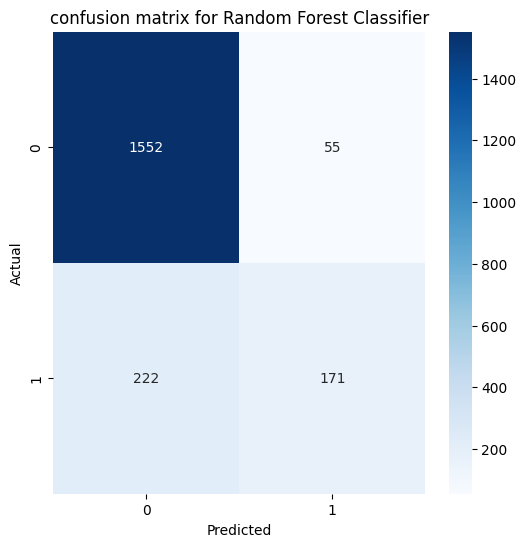

In [503]:
plt.figure(figsize= (6,6))
sns.heatmap(confusion_matrix(y_test,RFy_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix for Random Forest Classifier')
plt.show()

OBS: 
- The True Positive shows --> the count of correctly classified data points
- the False Positive shows --> those count of misclassified points.

Note : The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

--> Distribution plot 

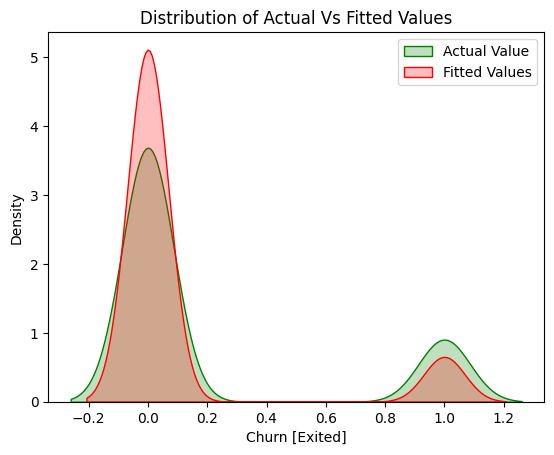

In [531]:
ax = sns.kdeplot(y_test, fill=True, color = 'Green', label = "Actual Value")
sns.kdeplot(RFy_pred, fill=True, color='r', label='Fitted Values', ax=ax)
plt.xlabel('Churn [Exited]')
plt.title('Distribution of Actual Vs Fitted Values')
plt.legend()
plt.show()

--> Classification Report 

In [511]:
print(classification_report(y_test,RFy_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [515]:
print('Acuuracy Score : ', accuracy_score(y_test,RFy_pred))
print('\n Mean absolute Error :',mean_absolute_error(y_test,RFy_pred))
print('\n R2 score :', r2_score(y_test,RFy_pred))

Acuuracy Score :  0.8615

 Mean absolute Error : 0.1385

 R2 score : 0.12279451699071009


##### 2 - Descion Tree Classifier 

--> Confusion Matrix HeatMap

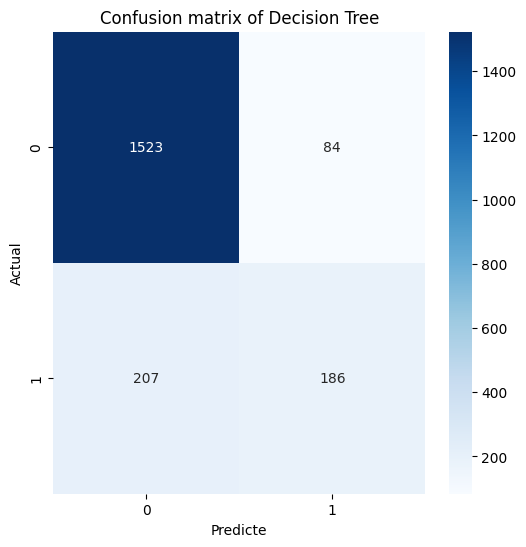

In [521]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,DTy_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix of Decision Tree')
plt.xlabel('Predicte')
plt.ylabel('Actual')
plt.show()

OBS: 
- The True Positive shows --> the count of correctly classified data points
- the False Positive shows --> those count of misclassified points.

Note : The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

--> Distribution plot

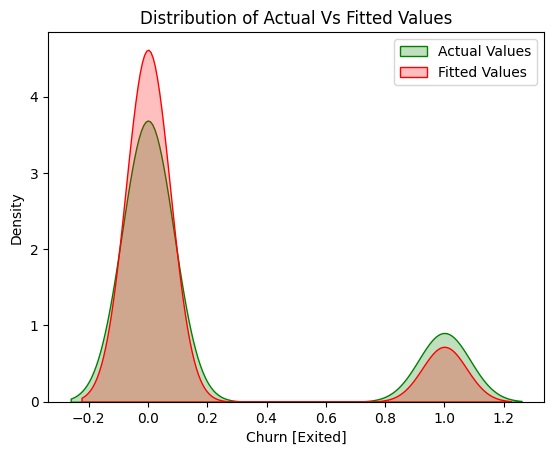

In [530]:
ax = sns.kdeplot(y_test, shade=True, color='Green',label='Actual Values')
sns.kdeplot(DTy_pred,shade=True,color='r',label='Fitted Values',ax=ax)
plt.title('Distribution of Actual Vs Fitted Values')
plt.xlabel('Churn [Exited]')
plt.legend()
plt.show()

--> Classification Report

In [532]:
print(classification_report(y_test,DTy_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.47      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [534]:
print('Acuuracy Score : ', accuracy_score(y_test,DTy_pred))
print('\nMean absolute Error :',mean_absolute_error(y_test,DTy_pred))
print('\nR2 score :', r2_score(y_test,DTy_pred))

Acuuracy Score :  0.8545

Mean absolute Error : 0.1455

R2 score : 0.07845922182056542


### `--> Conclusion`

## Factors Influencing Customer Churn

Based on EDA,<br>
the churn count of customers is influenced by the following factors:

- **Age**
- **Geography**
- **Tenure**
- **Balance**
- **Number of Products**
- **Has Credit Card**
- **Is Active Member**

## Model Comparison

The following classification models were used to predict customer churn:
1. **Logistic Regression**
2. **Decision Tree Classifier**
3. **Random Forest Classifier**

Both DT and RF models were hyperparameter tuned using **GridSearchCV**. Although both models produced nearly equal accuracy scores, the **Random Forest Classifier** showed superior performance in terms of accuracy and precision, making it a better choice than the **Decision Tree Classifier**.
**Logistic Regression** showed the least accuracy score, feature selection was applies on logistic regression model.
